In [3]:
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.datasets import make_moons
import numpy as np

sns.set()

In [4]:
# Chargement du dataset d'exemple, iris
# Observation sur des fleurs (iris)
iris = sns.load_dataset('iris')
# Dénommination des classes cibles
iris['species'].unique()
#iris['species'].nunique() # Nombre de classe

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Supervise
Regression
Cible -> valeur numérique (infinité de valeur -> interval)

Classification
Cible -> valeur catégorique

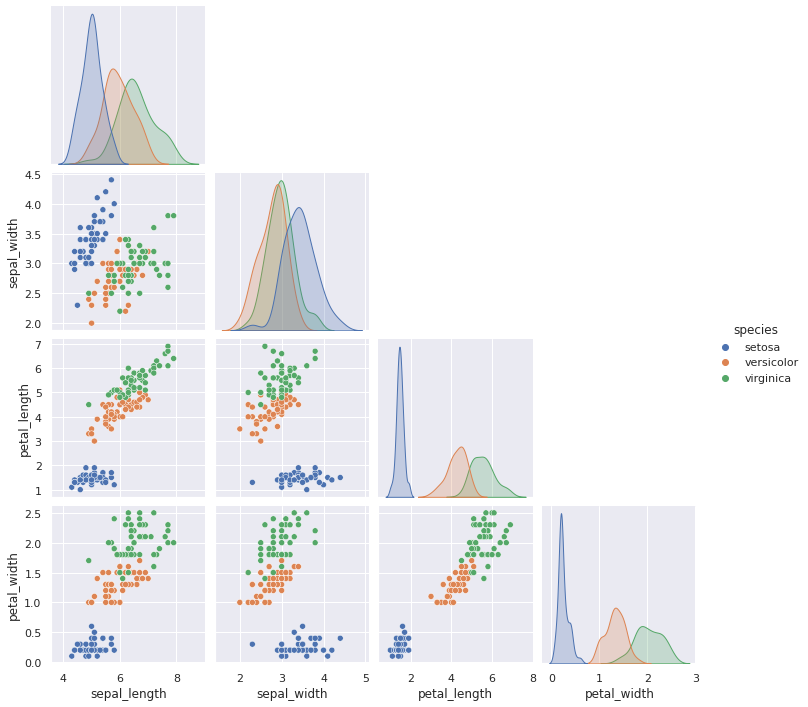

In [18]:
# KDE: Kernel Distribution Estimation (Histogramme plus lisse)
# corner: supprime la diagonale supérieur (le valeur miroir)
sns.pairplot(iris, hue='species', diag_kind='kde', corner=True)

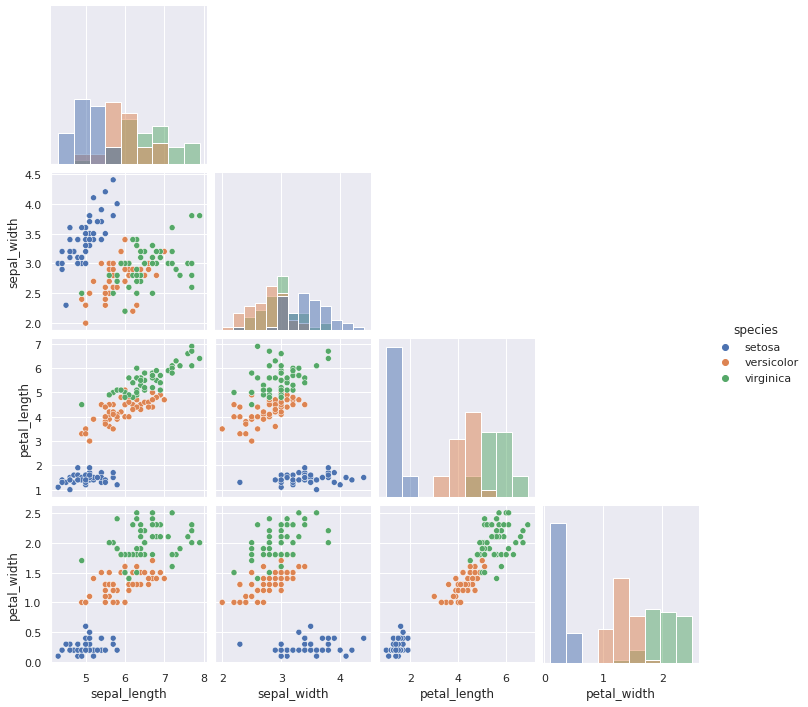

In [19]:
sns.pairplot(iris, hue='species', diag_kind='hist', corner=True)

# Separer les features de la target

In [12]:
# Target Transformer les target en nombre (encodage)
Y = iris['species'].astype('category').cat.codes

In [70]:
# Dictionnaire de d'index vers classe
# Dictionnaire de classe vers index
vocabulaire = iris['species'].astype('category').cat.categories
classe2index = {v:i for i, v in enumerate(vocabulaire.tolist())}
index2class = {i:v for i, v in enumerate(vocabulaire.tolist())}
# import pickle # Sauvegarde les dictionnaires

# Supprimer la colonne cible

In [57]:
# Isoler nos features. On enleve la colonne cible du dataset
X = iris.drop('species', axis='columns')

In [42]:
# Vérifier que les shapes correspondent
X.shape, Y.shape # virgule vide = 1
# (n, p) -> n doivent etre identique

((150, 4), (150,))

Minimum syndical
1. Charger le dataset
1. Trouver Y
1. Trouver X

# Entrainer un model

K - Nearest Neighbors

Représentation des features comme des dimensions dans un espace

Entrainement -> memorisation du dataset

Prediction

-> pour un nouveau point, calcul des voisins les plus proches dans le dataset

-> determination du nouveau point en fonction des points trouves

In [44]:
# Installation de sklearn
!pip3 install sklearn

     |████████████████████████████████| 6.8 MB 282 kB/s eta 0:00:01
     |████████████████████████████████| 300 kB 956 kB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=b0f5b297cb845cfa9a5d272657e2da3f9ffc55b022aa40dd1b86e9a6e002b8c1
  Stored in directory: /home/yassin/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [8]:
# SKLearn = API de tous les modeles
# Import de sklearn.neighbors
# KNN: K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN

In [10]:
knn = KNN(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [13]:
# Entrainement du model
knn.fit(X, Y)

ValueError: could not convert string to float: 'setosa'

In [62]:
# Faire une prediction
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [60]:
# Creer une mesure de performance
def accuracy(preds, target):
    M = target.shape[0] # Nombre de lignes
    total_correctes = (preds == target).sum()
    return total_correctes / M # Accuracy

In [63]:
predictions = knn.predict(X)
accuracy(predictions, Y)

0.96

In [64]:
# 1) Affichage des frontières de décisions d'un graphe
# 2) SPLIT_TRAINTES

# Tracer les frontières

In [140]:
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=0, noise=0.1)

In [141]:
import pandas as pd
df_moon = pd.DataFrame({'X0':X[:, 0],
                        'X1':X[:, 1],
                        'Y':Y})

In [142]:
df_moon.head()

,X0,X1,Y
0,-0.053484,0.992582,0
1,1.819900,-0.175600,1
2,0.955357,0.059999,0
3,0.015581,0.110817,1
4,0.964549,-0.512765,1


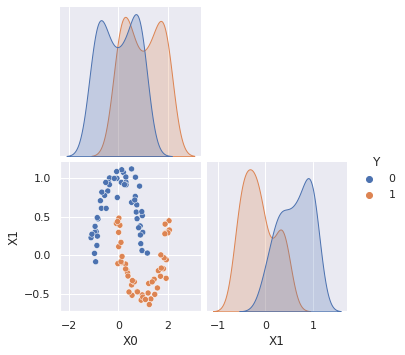

In [143]:
sns.pairplot(df_moon, hue='Y', corner=True)

In [144]:
import numpy as np

# 1) Créer le maillage
# Determiner la plage de valeur
def plage_de_valeur(df, col, b=0.2):
    # b : bordure
    min = df[col].min() - b
    max = df[col].max() + b
    return (min, max)

In [145]:
# Creer les axes
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1)
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

In [146]:
# Creer le maillage
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)
# Demeler le maillage
# Tout mettre sur 1 seule colonne
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel()

In [147]:
mesh_df = pd.DataFrame({'X0': X0_mesh, 'X1': X1_mesh})

/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

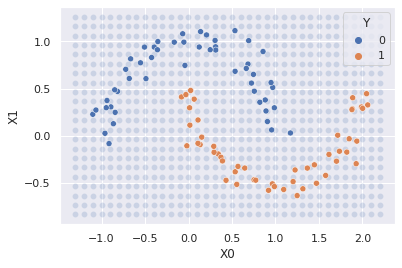

In [148]:
sns.scatterplot(X0_mesh, X1_mesh, alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

In [149]:
# Avec K = 1
knn = KNN(n_neighbors=1)
# Entrainer sur moon
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

In [150]:
mesh_predictions = knn.predict(mesh_df)

/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X0', ylabel='X1'>

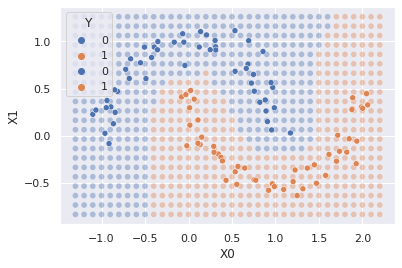

In [151]:
sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.4)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

In [152]:
# Fonction
def plot_knn_describe(K=1):
    print('K = {}'.format(K))
    knn = KNN(n_neighbors=K)
    # Entrainer sur moon
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.4)
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

K = 1


/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


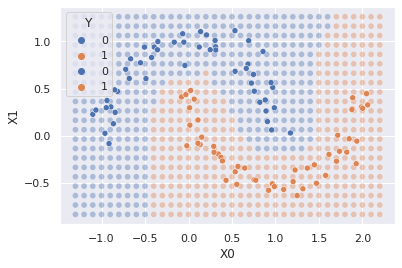

In [153]:
plot_knn_describe(1)

# ============================================================

In [25]:
from sklearn.model_selection import train_test_split

splits = train_test_split(X, Y, random_state=0, stratify=Y)

X_tr, X_te, Y_tr, Y_te = splits

# ============================================================

# KNN et PCA

In [24]:
import seaborn as sns
sns.set()

iris = sns.load_dataset('iris')

classe = iris['species'].astype('category').cat.categories.tolist()
X = iris.drop('species', axis='columns')
Y = iris['species'].astype('category').cat.codes

In [23]:
from sklearn.decomposition import PCA

# Hyper parametre n_component non precise au debut
pca = PCA()
pca.fit(X)

PCA()

In [27]:
# Transformer le PCA
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

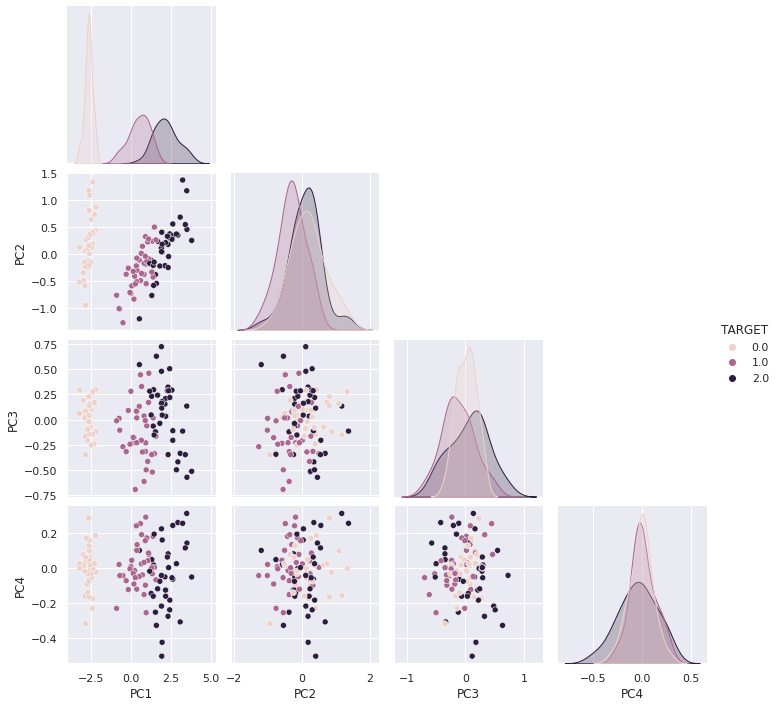

In [33]:
# Pour améliorer la visu
data_PCA = np.append(X_tr_PCA, Y_tr.to_numpy().reshape(-1, 1), axis=1)
iris_PCA = pd.DataFrame(data=data_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'TARGET'])
sns.pairplot(iris_PCA, hue='TARGET', corner=True)

/home/yassin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC')

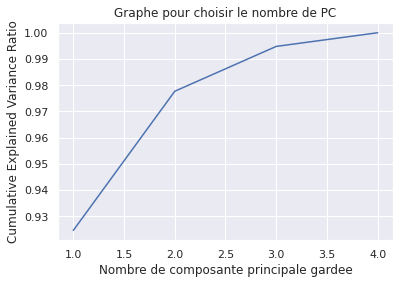

In [35]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1, 2, 3, 4], cumsum)
plt.xlabel('Nombre de composante principale gardee')
plt.ylabel('Cumulative Explained Variance Ratio') # Ratio d'Informations (==variance) Conservees
plt.title('Graphe pour choisir le nombre de PC')

In [36]:
pca = PCA(n_components=2)

pca.fit(X_tr)
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

In [38]:
X_tr_PCA.shape, X_te_PCA.shape

((112, 2), (38, 2))

PCA
- Identifier n_components
- Appliquer

# Digit (2000, 65)
Basé sur MNIST (60 000, 724)

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

images = digits.images
targets = digits.target

X = images.reshape(-1, 64)
Y = targets

4

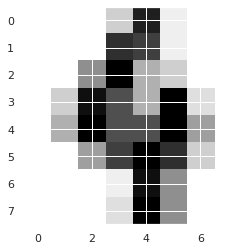

In [48]:
# Affichage des images dans digits et targets
import matplotlib.pyplot as plt
index = 97
plt.imshow(images[index], cmap='binary')
targets[index]

In [51]:
from sklearn.model_selection import train_test_split as TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=777, train_size=0.8)

for each in [X_tr, X_te, Y_tr, Y_te]:
    print(each.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


# Mise en place Pipeline

In [53]:
# Pipeline elements
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
# Creation pipeline
# Creation des details de la pipeline
# Liste de tuple (nom_element, classe_element)
pipeline_details = [('pca', PCA(random_state=42)), # Passer les hyper parametres aux arguments des constructeurs
                   ('knn', KNN())]
pipeline = Pipeline(pipeline_details)

# Parametres du grid search
hyperparameters = {}
# nom_cle + __ + nom_hyper_parametre
hyperparameters['pca__n_components'] = list(range(1, 64+1, 3))
hyperparameters['knn__n_neighbors'] = [1, 3, 5, 9, 21]

# Creation du grid search
hyperparameters_search = GridSearchCV(pipeline,
                                      hyperparameters,
                                      scoring='accuracy',
                                      cv=5)

# Lancer la recherche
hyperparameters_search.fit(X_tr, Y_tr) # Un peu long

# Recolte des resultats
hyperparameters_search.best_score_

0.985387630662021

In [63]:
# Recolte des resultats
hyperparameters_search.best_score_

0.985387630662021

In [64]:
# Meilleurs parametres
hyperparameters_search.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 43}

In [69]:
# Entrainement du model avec la meilleur config (estimee) sur la totalite du train set
pca = PCA(n_components=43)
knn = KNN(n_neighbors=3)

pca.fit(X_tr)
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)
knn.fit(X_tr_PCA, Y_tr)
predictions = knn.predict(X_te_PCA)

# Accuracy
accuracy = lambda p,y: (p==y).sum()/p.shape[0]
accuracy(predictions, Y_te)

0.9944444444444445

In [74]:
# Test sur le model entraine
train_preds = knn.predict(X_tr_PCA)
"Train accuracy", accuracy(train_preds, Y_tr)

('Train accuracy', 0.9916492693110647)

# Bonus: Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix
labels = range(10)
cm_train = confusion_matrix(train_preds, Y_tr, labels)
cm_test = confusion_matrix(predictions, Y_te, labels)

In [86]:
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

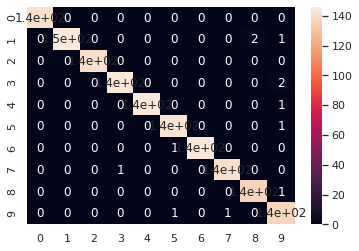

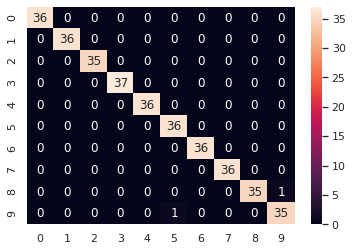

In [88]:
show_cm(cm_train, labels)
show_cm(cm_test, labels)